In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [5]:
clientes = pd.read_csv('/content/drive/MyDrive/python/clientes.csv')
agendamentos = pd.read_csv('/content/drive/MyDrive/python/agendamentos.csv')
financeiro = pd.read_csv('/content/drive/MyDrive/python/financeiro.csv')
profissionais = pd.read_csv('/content/drive/MyDrive/python/profissionais.csv')

clientes.head()

,cliente_id,idade,sexo,bairro,data_primeira_visita
0,1,22,F,Centro,2024-01-01
1,2,25,F,Setor Oeste,2024-01-08
2,3,30,F,Bueno,2024-01-15
3,4,28,M,Centro,2024-01-22
4,5,35,F,Jardim América,2024-01-29


In [7]:
financeiro.columns


Index(['agendamento_id', 'valor_cobrado', 'custo_servico'], dtype='object')

In [9]:
agendamentos['data'] = pd.to_datetime(agendamentos['data'])

financeiro = financeiro.merge(
    agendamentos[['agendamento_id', 'data']],
    on='agendamento_id',
    how='left'
)

financeiro['mes'] = financeiro['data'].dt.to_period('M')

In [10]:
agendamentos['data'] = pd.to_datetime(agendamentos['data'])
financeiro['data'] = pd.to_datetime(financeiro['data'])

In [13]:
#metrica de faturamento mensal
financeiro['mes'] = financeiro['data'].dt.to_period('M')

faturamento_mensal = financeiro.groupby('mes')['valor_cobrado'].sum()

faturamento_mensal

,valor_cobrado
mes,
2024-01,7960
2024-02,10140
2024-03,10140
2024-04,10140
2024-05,10320
2024-06,10140
2024-07,10140
2024-08,10440
2024-09,10140


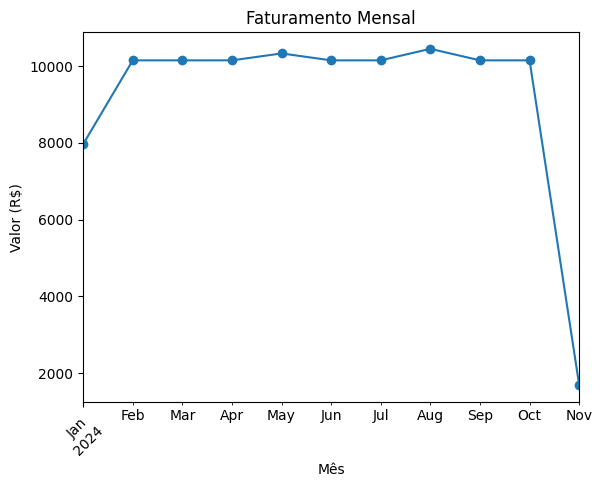

In [15]:
#GRÁFICO: FATURAMENTO MENSAL
plt.figure()
faturamento_mensal.plot(kind='line', marker='o')
plt.title('Faturamento Mensal')
plt.xlabel('Mês')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.show()


In [17]:
#METRICA 2 FATURAMENTO POR SERVIÇO


financeiro_com_servico = financeiro.merge(agendamentos[['agendamento_id', 'servico']], on='agendamento_id', how='left')

faturamento_servico = financeiro_com_servico.groupby('servico')['valor_cobrado'].sum().sort_values(ascending=False)

faturamento_servico

,valor_cobrado
servico,
Preenchimento,45000
Botox,36000
Laser,9000
Drenagem,6000
Limpeza de Pele,5400


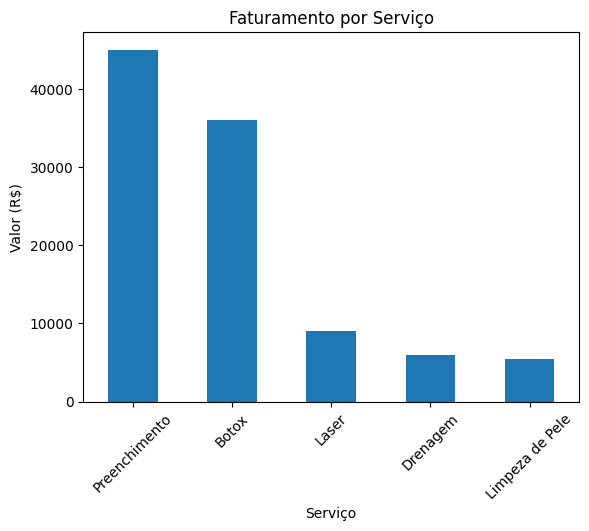

In [18]:
#GRAFICO FATURAMENTO POR SERVIÇO
plt.figure()
faturamento_servico.plot(kind='bar')
plt.title('Faturamento por Serviço')
plt.xlabel('Serviço')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.show()

In [21]:
#METRICA 3 TICKET MEDIO
ticket_medio = financeiro['valor_cobrado'].mean()
ticket_medio

np.float64(676.0)

In [24]:
#METRICA 4 TAXA DE FALTAS
faltas = agendamentos[agendamentos['status'] == 'Falta']
taxa_faltas = (len(faltas) / len(agendamentos)) * 100

taxa_faltas


0.0

In [25]:
#FALTAS POR MES
faltas = agendamentos[agendamentos['status'] == 'Falta']
taxa_faltas = (len(faltas) / len(agendamentos)) * 100

taxa_faltas


0.0

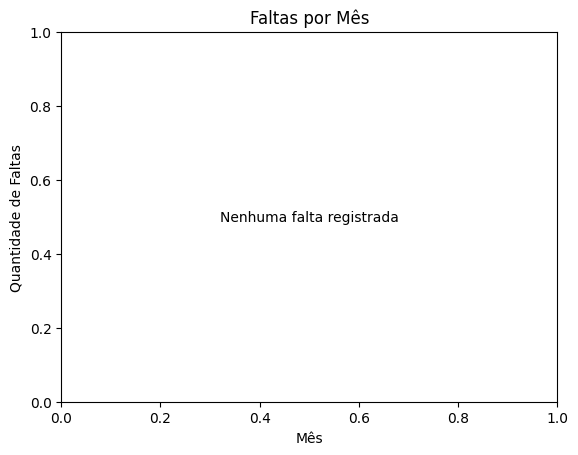

In [28]:
#GRÁFICO: FALTAS POR MÊS
plt.figure()

# Calculate faltas_mes from the 'faltas' DataFrame
# Assuming 'faltas' has already been defined in a previous cell and 'data' is datetime
if not faltas.empty:
    faltas_copy = faltas.copy()
    faltas_copy['mes'] = faltas_copy['data'].dt.to_period('M')
    faltas_mes = faltas_copy.groupby('mes').size()
else:
    # If no 'Falta' entries, faltas_mes should be an empty Series
    faltas_mes = pd.Series(dtype=int)

if not faltas_mes.empty:
    faltas_mes.plot(kind='bar')
    plt.title('Faltas por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de Faltas')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, "Nenhuma falta registrada", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title('Faltas por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de Faltas')
    plt.ylim(0,1)

plt.show()


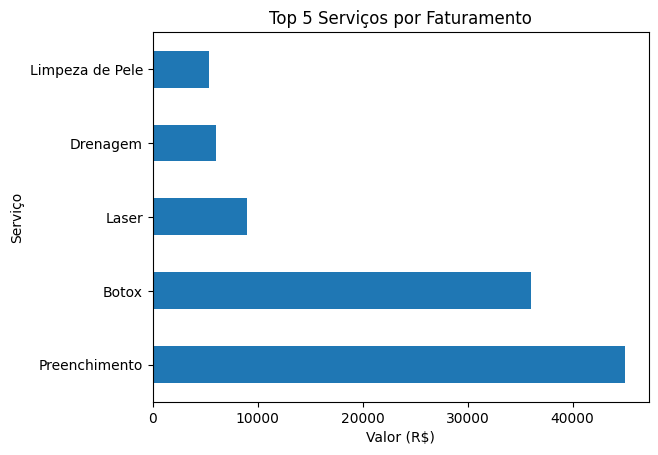

In [29]:
#MÉTRICA 5 TOP 5 SERVIÇOS
top_servicos = faturamento_servico.head(5)

plt.figure()
top_servicos.plot(kind='barh')
plt.title('Top 5 Serviços por Faturamento')
plt.xlabel('Valor (R$)')
plt.ylabel('Serviço')
plt.show()


In [31]:
#INSIGHTS
print(f"Faturamento médio mensal: R$ {faturamento_mensal.mean():.2f}")
print(f"Ticket médio: R$ {ticket_medio:.2f}")
print(f"Taxa geral de faltas: {taxa_faltas:.2f}%")

Faturamento médio mensal: R$ 9218.18
Ticket médio: R$ 676.00
Taxa geral de faltas: 0.00%
